# Final Project

Main Title : 투자 받았다! 마케팅팀의 요청! 할인 쿠폰을 언제, 누구에게, 어떻게 제공할까?

Sub Title : 결제 가능성이 가장 높아질 수 있도록 고객 세분화를 통해 다음을 결정한다.
> - 할인 쿠폰 제공 시간대
> - 쿠폰 제공 대상
> - 쿠폰 제공 방식 (카드 캐시백/ 사전 할인쿠폰)

활용 데이터
>- 차이코퍼레이션 고객 결제 데이터
>- 차이코퍼레이션 구글 스토어 리뷰 크롤링 데이터

## 차이코퍼레이션 결제 데이터를 이용한 EDA

- 차이코퍼레이션의 고객 데이터를 활용하여 EDA 수행


In [1]:
# 외부 라이브러리
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rc
import seaborn as sns
import missingno as msno
import warnings

In [2]:
import matplotlib.font_manager as fmb


In [3]:
# 시각화를 위한 한글 font 설정
#plt.rcParams['font.family']
#plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family']

# 시각화를 위한 마이너스 폰트 깨짐 방지
#plt.rcParams['axes.unicode_minus'] = False

# 소숫점 둘째자리까지 표현
pd.options.display.float_format = '{:.2f}'.format

# 시각화를 위한 한글 font 설정 for 맥북
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [9]:
# 데이터 불러오기
chai_df = pd.read_csv('/Users/soon/Desktop/final_project/차이코퍼레이션 결제 데이터(BA_assesment).csv')

### 결측데이터 확인

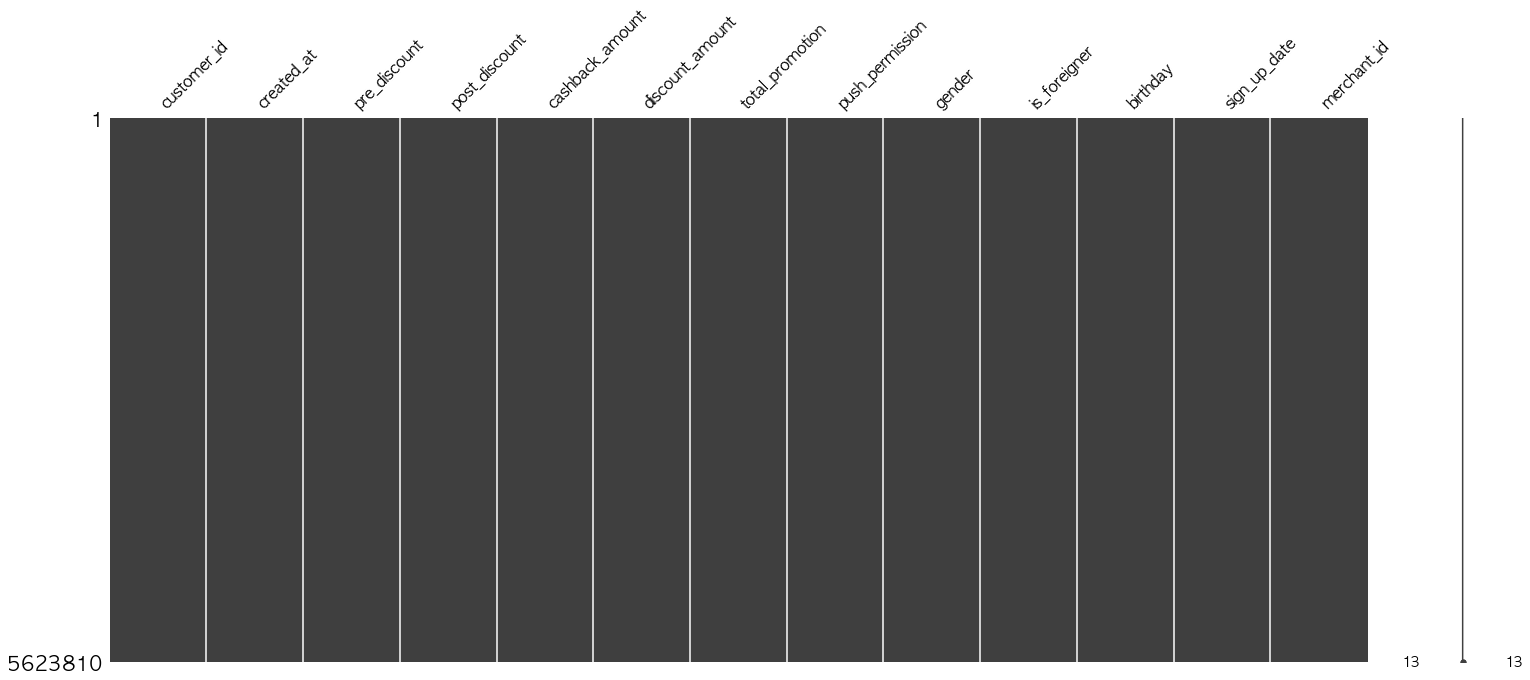

In [10]:
# 결측데이터 확인
msno.matrix(chai_df)
plt.show()

In [11]:
# 컬럼별 결측 데이터 수
chai_df.isnull().sum()

customer_id        0
created_at         0
pre_discount       0
post_discount      0
cashback_amount    0
discount_amount    0
total_promotion    0
push_permission    0
gender             0
is_foreigner       0
birthday           0
sign_up_date       0
merchant_id        0
dtype: int64

### 데이터 탐색 : EDA

In [12]:
# 데이터의 평균, 중간값, 분산, 표준편차, 백분위수 등의 특징 확인
chai_df.describe()

,customer_id,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,merchant_id
count,5623810.00,5623810.00,5623810.00,5623810.00,5623810.00,5623810.00,5623810.00
mean,272331.67,20455.33,19033.95,122.67,1421.38,1544.05,5.50
std,157247.95,48731.63,47552.06,593.51,1960.64,1979.35,2.63
min,1.00,1.00,0.00,0.00,0.00,0.00,1.00
25%,136186.00,7900.00,6900.00,0.00,0.00,542.00,3.00
50%,272568.00,11900.00,10900.00,0.00,1000.00,1000.00,6.00
75%,408236.00,19800.00,17920.00,0.00,2000.00,2000.00,8.00
max,544921.00,1996000.00,1996000.00,97473.00,500000.00,500000.00,10.00


In [13]:
chai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   customer_id      int64 
 1   created_at       object
 2   pre_discount     int64 
 3   post_discount    int64 
 4   cashback_amount  int64 
 5   discount_amount  int64 
 6   total_promotion  int64 
 7   push_permission  bool  
 8   gender           object
 9   is_foreigner     bool  
 10  birthday         object
 11  sign_up_date     object
 12  merchant_id      int64 
dtypes: bool(2), int64(7), object(4)
memory usage: 482.7+ MB


In [14]:
# 컬럼  영문 > 한글

#고객id (customer_id),
#결제일 (created_at)
#할인전 (pre_discount)
#할인후(결제금액) (post_discount)
#적립금액 (cashback_amount)
#할인금액 (discount_amount)
#총혜택받은금액 (total_promotion)
#푸시여부 (push_permission)
#성별 (gender)
#외국인여부 (is_foreigner()
#생년월일 (birthday)
#가입일 (sign_up_date)
#판매자식별번호(merchant_id)

chai_df.columns = ['고객id', '결제일', '할인전',
                   '할인후(결제금액)', '적립금액', '할인금액', '총혜택받은금액', '푸시여부', '성별', 
                   '외국인여부', '생년월일', '가입일', '판매자식별번호']

In [15]:
# 결제일 컬럼 날짜 형변환 및 년,월,일,시 컬럼 나누기 전처리
chai_df['결제일_뉴'] = chai_df['결제일'].astype('datetime64')

# 결제일 컬럼 날짜 형변환 및 년,월,일,시 컬럼 나누기 전처리
chai_df['결제일_연'] = chai_df['결제일_뉴'].dt.year  # 연도
chai_df['결제일_월'] = chai_df['결제일_뉴'].dt.month  # 월
chai_df['결제일_일'] = chai_df['결제일_뉴'].dt.day  # 일
chai_df['결제일_시각'] = chai_df['결제일_뉴'].dt.hour  # 시간

In [16]:
# 가입일 컬럼 날짜 형변환 및 년,월,일,시 컬럼 나누기 전처리
chai_df['가입일_뉴'] = chai_df['가입일'].astype('datetime64')

# 가입일 컬럼 날짜 형변환 및 년,월,일,시 컬럼 나누기 전처리
chai_df['가입일_연'] = chai_df['가입일_뉴'].dt.year  # 연도
chai_df['가입일_월'] = chai_df['가입일_뉴'].dt.month  # 월
chai_df['가입일_일'] = chai_df['가입일_뉴'].dt.day  # 일
chai_df['가입일_시각'] = chai_df['가입일_뉴'].dt.hour  # 시간

In [17]:
# 생년월일 컬럼 object Dtype -> datetime Dtype
chai_df['생년월일'] = pd.to_datetime(chai_df['생년월일'])

#### 파생 컬럼 생성
>1. 프로모션율
>2. 고객 나이
>3. 가입일과 결제일 사이 기간
>4. 결제 요일

In [18]:
# 1. 프로모션율
chai_df['프로모션율'] = chai_df['총혜택받은금액'] / chai_df['할인전'] * 100

In [19]:
# 2. 고객 나이

# 고객 나이(1) 올해 연도 추출
date = datetime.date.today()
chai_df['올해'] = date.strftime('%Y-%m-%d')
chai_df['올해'] = pd.to_datetime(chai_df['올해'])

# 고객 나이(2) 나이 계산
chai_df['나이'] = chai_df['올해'].dt.year - chai_df['생년월일'].dt.year

# 고객 나이(3) 나이대 계산
chai_df['나이대'] = chai_df['나이'] // 10 * 10

In [20]:
# 3. 가입일과 결제일 사이 기간

# 가입일과 결제일 사이 기간을 일수로 추출
from datetime import datetime, timedelta
chai_df['결제구간'] = chai_df['결제일_뉴'] - chai_df['가입일_뉴']
chai_df['결제구간'] = chai_df['결제구간'].dt.days

In [21]:
# 4. 결제 요일
chai_df['요일'] = pd.to_datetime(chai_df['결제일'])
chai_df['요일'] = chai_df['요일'].dt.day_name()
chai_df['요일']

0            Sunday
1          Thursday
2          Saturday
3            Friday
4            Friday
             ...   
5623805    Thursday
5623806      Friday
5623807      Sunday
5623808     Tuesday
5623809    Thursday
Name: 요일, Length: 5623810, dtype: object

#### 월별 유저 수 추세

In [24]:
# 결제일 컬럼을 결제일_연월로 추출
chai_df['결제일_연월'] = chai_df['결제일_뉴'].dt.strftime('%Y-%m')

# 결제일_연월 별 결제 건수 피봇 테이블 생성
pivot_chai = pd.pivot_table(
    data=chai_df, index='결제일_연월', values='결제일', aggfunc='count')
pivot_chai = pivot_chai.reset_index()
pivot_chai

,결제일_연월,결제일
0,2019-08,695393
1,2019-09,601036
2,2019-10,679559
3,2019-11,724012
4,2019-12,658415
5,2020-01,938568
6,2020-02,710419
7,2020-03,616408


/var/folders/s5/p9v5v4795132_w2y_ymwbtk80000gn/T/ipykernel_54773/823496801.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


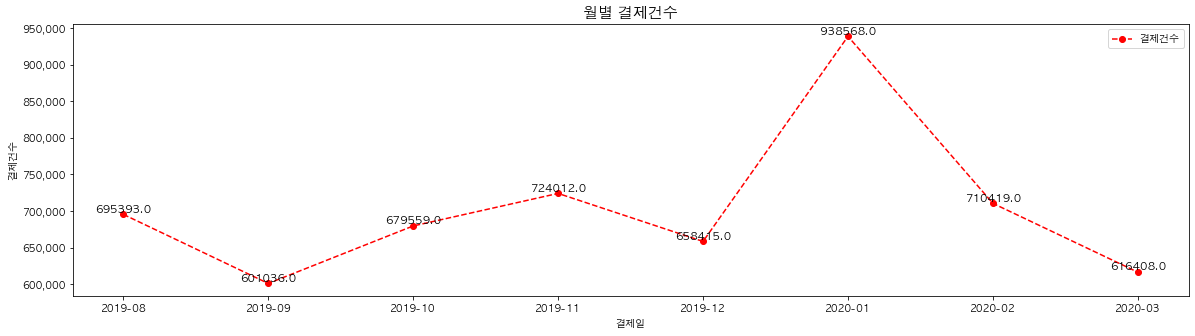

In [25]:
# 결제일_연월 별 결제 건수 피봇 테이블 시각화
plt.figure(figsize=(20, 5))
x1 = pivot_chai['결제일_연월']
y1 = pivot_chai['결제일']
plt.plot(x1, y1, "ro--", label="결제건수")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('결제일')  # x축 타이틀 지정
plt.ylabel('결제건수')  # y축 타이틀 지정
for i in range(len(x1)):   # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
    height = y1[i]
    plt.text(x1[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=11)
    plt.title('월별 결제건수', size=15)
plt.legend()
plt.show()

In [27]:
# 결제일_연월 별 결제금액 피봇 테이블 생성
pivot_chai2 = pd.pivot_table(
    data=chai_df, index='결제일_연월', values='할인후(결제금액)', aggfunc='sum')
pivot_chai2 = pivot_chai2.reset_index()
pivot_chai2

,결제일_연월,할인후(결제금액)
0,2019-08,10140004315
1,2019-09,11011597431
2,2019-10,16588333816
3,2019-11,13267905077
4,2019-12,15045601451
5,2020-01,18357805126
6,2020-02,11718702444
7,2020-03,10913372575


/var/folders/s5/p9v5v4795132_w2y_ymwbtk80000gn/T/ipykernel_54773/3185000442.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


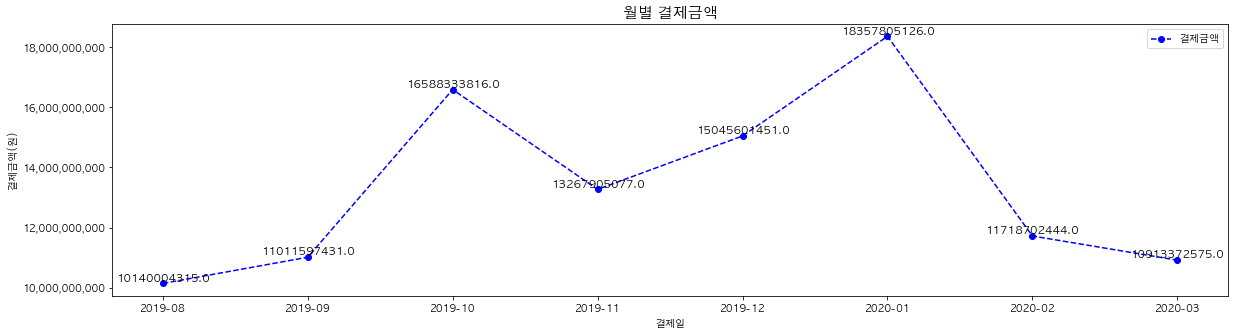

In [28]:
# 결제일_연월 별 결제금액 피봇 테이블 시각화
plt.figure(figsize=(20, 5))
x2 = pivot_chai2['결제일_연월']
y2 = pivot_chai2['할인후(결제금액)']
plt.plot(x2, y2, "bo--", label="결제금액")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
for i in range(len(x2)):   # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
    height = y2[i]
    plt.text(x2[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=11)
plt.legend()
plt.xlabel('결제일')  # x축 타이틀 지정
plt.ylabel('결제금액(원)')  # y축 타이틀 지정
plt.title('월별 결제금액', size=15)
plt.legend()
plt.show()

In [29]:
# MAU(Monthly Active User)
# 활성 사용자 수를 실제 결제까지 완료한 사람으로 정의한다.
MAU = chai_df.groupby(['결제일_연월'], as_index=False).agg(
    {'고객id': pd.Series.nunique})
MAU = MAU.rename(index=str, columns={'결제일_연월': '결제일_연월', '고객id': 'MAU'})
MAU

,결제일_연월,MAU
0,2019-08,196064
1,2019-09,156726
2,2019-10,171234
3,2019-11,184564
4,2019-12,196588
5,2020-01,249481
6,2020-02,233036
7,2020-03,194129


/var/folders/s5/p9v5v4795132_w2y_ymwbtk80000gn/T/ipykernel_54773/2297222731.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


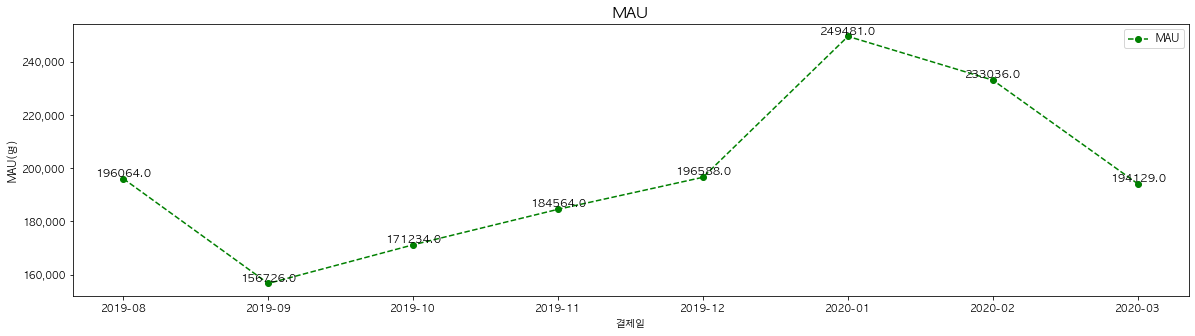

In [30]:
# MAU 시각화
plt.figure(figsize=(20, 5))
x3 = MAU['결제일_연월']
y3 = MAU['MAU']
plt.plot(x3, y3, "go--", label="MAU")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
for i in range(len(x3)):   # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
    height = y3[i]
    plt.text(x3[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=11)
plt.xlabel('결제일')  # x축 타이틀 지정
plt.ylabel('MAU(명)')  # y축 타이틀 지정
plt.title('MAU', size=15)
plt.legend()
plt.show()

#### 유저 수

In [31]:
# 유저수 알아보기
chai_df['고객id'].value_counts()

45419     2705
445691    2630
485910    1684
400418    1363
96306     1229
          ... 
1869         1
415134       1
162114       1
225078       1
30777        1
Name: 고객id, Length: 544921, dtype: int64

결론 : 중복 주문한 고객들이 존재한다.

#### 유저 성비

In [32]:
gender_count = chai_df['성별'].value_counts()
gender_count

female    4070077
male      1553733
Name: 성별, dtype: int64

In [33]:
gender_count.index

Index(['female', 'male'], dtype='object')

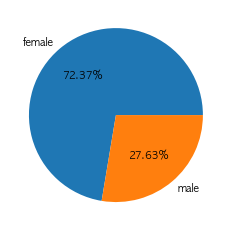

In [34]:
plt.pie(gender_count.values, labels=gender_count.index, autopct="%1.2f%%")
plt.show()

결론 : 여성 user:남성 user = 7:3 -> 여성 사용자 비율이 더 높다.

#### 푸시여부

In [37]:
push_permission_count = chai_df['푸시여부'].value_counts()
push_permission_count

True     2907346
False    2716464
Name: 푸시여부, dtype: int64

In [38]:
push_permission_count.index

Index([True, False], dtype='object')

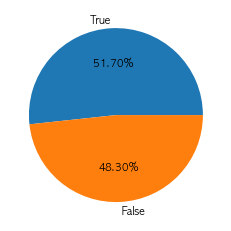

In [39]:
plt.pie(push_permission_count,
        labels=push_permission_count.index, autopct="%1.2f%%")
plt.show()

In [40]:
print(len(chai_df['고객id'].unique()))

544921


#### 유저별 결제 건수

In [29]:
# 유저별 거래 횟수 탐색
customer_unique_transaction_series = chai_df.groupby('고객id')['결제일'].nunique()
customer_unique_transaction_series.describe()

count   544921.00
mean        10.32
std         20.79
min          1.00
25%          1.00
50%          3.00
75%         10.00
max       2705.00
Name: 결제일, dtype: float64

결론 :  
유저수_544921명  
평균_10회의 구매  
최대_2705의 구매 (이상치 일수도 있으므로 확인 필요)


#### 나이대 별 결제 건수 확인

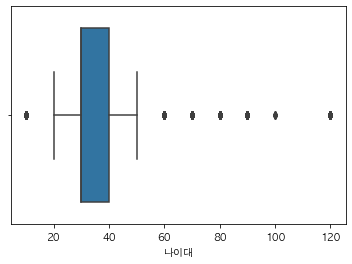

In [31]:
# 나이대별 결제 건수 이상치 확인
나이대 = chai_df['나이대']
sns.boxplot(x=나이대)
plt.show()

In [32]:
# 나이대별 결제 건수 이상치 확인
age_unique_transaction_series = chai_df.groupby('나이대')['고객id'].nunique()
age_unique_transaction_series.describe()

count       11.00
mean     49538.27
std      77233.12
min          1.00
25%        939.00
50%       3902.00
75%      76984.50
max     215720.00
Name: 고객id, dtype: float64

In [41]:
# 나이대와 결제일_연월별 결제 건수
chai_age = pd.DataFrame(chai_df.groupby(['나이대', '결제일_연월'])['결제일_연월'].count())
pd.set_option('display.max_rows', 300)
chai_age

결제일_연월
나이대 결제일_연월         
10  2019-08    1590
    2019-09    1353
    2019-10    1247
    2019-11    1181
    2019-12     912
    2020-01    1890
    2020-02    2088
    2020-03    1540
20  2019-08  105339
    2019-09   98976
    2019-10  106889
    2019-11  112582
    2019-12   96368
    2020-01  146617
    2020-02  125984
    2020-03  108156
30  2019-08  249058
    2019-09  205768
    2019-10  234543
    2019-11  259437
    2019-12  236825
    2020-01  354133
    2020-02  267555
    2020-03  221246
40  2019-08  240992
    2019-09  207180
    2019-10  234990
    2019-11  249457
    2019-12  232983
    2020-01  318708
    2020-02  231399
    2020-03  204044
50  2019-08   74618
    2019-09   68482
    2019-10   79670
    2019-11   79611
    2019-12   71696
    2020-01   91004
    2020-02   66732
    2020-03   64966
60  2019-08   16881
    2019-09   15092
    2019-10   17597
    2019-11   17407
    2019-12   15948
    2020-01   21659
    2020-02   14319
    2020-03   14241
70  2019-08    2770
    2019-09    2003
    2019-10    2385
    2019-11    2541
    2019-12    2241
    2020-01    3526
    2020-02    1860
    2020-03    1882
80  2019-08     589
    2019-09     469
    2019-10     541
    2019-11     536
    2019-12     488
    2020-01     791
    2020-02     409
    2020-03     266
90  2019-08     137
    2019-09     109
    2019-10      89
    2019-11      68
    2019-12      45
    2020-01      53
    2020-02      73
    2020-03      67
100 2019-08       3
    2019-09       3
120 2019-08    3416
    2019-09    1601
    2019-10    1608
    2019-11    1192
    2019-12     909
    2020-01     187

In [42]:
# 나이대가 80대 이상인 유저 수 
len(chai_df.loc[chai_df['나이대'] >= 80])

13649

In [43]:
# 나이대가 80대 이상인 유저 수의 비율 보기
len(chai_df.loc[chai_df['나이대'] >= 80]) / len(chai_df.loc[chai_df['나이대'] >= 10]) * 100

0.24270023347161443

결론 : 
- 70대 이상의 나이대에서도 차이페이를 이용한 결제가 이루어짐을 알 수 있다.
- 120대에서의 차이페이를 이용한 결제 건수가 80대 이상의 결제 건수보다 많다는 것이 이상치로 보이지만, 하기와 같은 이유로 이상치 데이터를 제거하지 않았다.  
   (1) 주어진 데이터 전체를 이용하여 유저 분석 하기를 희망한 마케팅팀의 요청  
   (2) 자녀 혹은 손자의 대리결제 가능성이 있으나 그를 확정할 수 없는 점  
   (3) 나이대 80~120대의 유저 수가 13649명으로 전체의 0.24% 밖에 되지 않는 점

### 가설 검증
> [가설]
>1. 성별
>  - a. 여성이 남성보다 더 많이/더 큰 금액을 결제했을 것이다.
>  - b. 여성이 남성보다 총혜택받은금액이 더 클 것이다.  
>2. 나이대별
>  - a. 30대의 결제 건수가 가장 많을 것이고, 결제 금액 또한 클 것이다. 
>3. 결제일시
>   - a. 요일_월요일/금요일에 결제 건수가 높을 것이다.
>   - b. 시간대_출근 시간대/ 취침 전 결제 건수가 높을 것이다.  
>4. 광고 수신(푸시) 동의 여부
>   - a. 푸시를 받는 사람의 결제 건수가 높을 것이다.  
>5. 결제 아이디별
>   - a. 생일인 달에 프로모션율생일쿠폰 할인이 높았을 것이다. (생일쿠폰 제공 추정)
>   - b. 가입일자와 첫 구매 일자의 간격이 짧은 사람이 혜택 받은 총 금액이 클 것이다. (첫 구매 할인혜택 등을 이용하기 위해 가입했을 것이라고 추정)
>   - c. [RFM 분석] R/F/M을 기준으로 고객 등급을 나눠(Platinum - Gold - Silver - Bronze) 차등 혜택을 제공할 수 있다.
>   - d. [코호트 분석] (코호트 분석_날짜 기준 고객 집단 분류) 재구매율/구매 규모를 기준으로 고객을 그룹화하여 그룹별로 차등 혜택을 제공할 수 있다.

**1-a. 여성이 남성보다 더 많이/더 큰 금액을 결제했을 것이다.**

In [45]:
# 성별과 할인후(결제금액) 사이의 관계
chai_df_gender = chai_df.groupby('성별').agg(
    {'할인후(결제금액)': ['count', 'sum', 'median', 'mean', 'min', 'max']})
chai_df_gender.loc['female/male'] = chai_df_gender.loc['female',
                                                       :] / chai_df_gender.loc['male', :]
pd.options.display.float_format = '{:.00f}'.format
chai_df_gender = chai_df_gender.reset_index()
chai_df_gender

성별 할인후(결제금액)                                     
                   count         sum median  mean min     max
0       female   4070077 71760079856  10900 17631   0 1996000
1         male   1553733 35283242379  10584 22709   0 1985950
2  female/male         3           2      1     1 NaN       1

결론 :  
- 여성의 결제 건수가 남성의 결제 건수의 약 3배이다.
- 여성의 결제금액의 총합은 남성의 결제금액의 총합의 약 2배이다.  
- 남성은 여성에 비해 결제 건수가 적은 것에 비해 결제금액 평균이 큰 것으로 보아, 큰 금액을 한 번에 결제하는 경향이 있다.

**1-b. 여성이 남성보다 총혜택받은 금액이 더 클 것이다.**

In [46]:
# 성별과 총혜택받은금액 사이의 관계
chai_df_gender2 = chai_df.groupby('성별').agg(
    {'총혜택받은금액': ['count', 'sum', 'median', 'mean', 'min', 'max']})
chai_df_gender2.loc['female/male'] = chai_df_gender2.loc['female',
                                                         :] / chai_df_gender2.loc['male', :]
chai_df_gender2 = chai_df_gender2.reset_index()
chai_df_gender2

성별 총혜택받은금액                                  
                 count        sum median mean min    max
0       female 4070077 5894137708   1000 1448   0 322562
1         male 1553733 2789297207   1290 1795   0 500000
2  female/male       3          2      1    1 NaN      1

In [47]:
# 혜택 받은 그룹과 받지 않은 그룹 여부 컬럼 생성
def promotion(x) :
    if x>0 : return 'True'
    else : return 'False'
chai_df['혜택여부'] = chai_df['총혜택받은금액'].apply(promotion)
chai_df.head(2)

,고객id,결제일,할인전,할인후(결제금액),적립금액,할인금액,총혜택받은금액,푸시여부,성별,외국인여부,...,가입일_일,가입일_시각,프로모션율,올해,나이,나이대,결제구간,요일,결제일_연월,혜택여부
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,...,30,16,3,2022-11-28,65,60,112,Sunday,2020-03,True
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,...,9,8,3,2022-11-28,39,30,247,Thursday,2020-03,True


In [50]:
# 혜택 받은 그룹과 받지 않은 그룹 성별 결제 금액 총합
chai_df_gender3 = pd.pivot_table(
    data=chai_df, values='할인후(결제금액)', index='혜택여부', columns='성별', aggfunc='sum')
chai_df_gender3.loc['혜택받은 금액 비율'] = chai_df_gender3.loc['True', :] / (chai_df_gender3.loc['False', :]+chai_df_gender3.loc['True', :]) * 100
chai_df_gender3 = chai_df_gender3.reset_index()
chai_df_gender3

성별,혜택여부,female,male
0,False,4601118952,1755622221
1,True,67158960904,33527620158
2,혜택받은 금액 비율,94,95


결론 :  
- 여성의 총혜택받은금액의 총합은 남성의 총혜택받은금액의 약 2배이다.  
- 남성은 프로모션 금액이 주어졌을 때 결제하는 경우가 많다.

**2-a. 30대가 가장 많이 사용했을 것이다.**

In [51]:
# 나이대와 할인후(결제금액) 사이의 관계
chai_df_age = chai_df.groupby('나이대').agg(
    {'할인후(결제금액)': ['count', 'sum', 'mean', 'min', 'max']})
chai_df_age = chai_df_age.reset_index()
chai_df_age

나이대 할인후(결제금액)                                
            count          sum  mean min      max
0    10     11801    158325492 13416   0   299000
1    20    900911  17312042017 19216   0  1976000
2    30   2028565  39777849867 19609   0  1973000
3    40   1919753  36001964165 18753   0  1996000
4    50    596779  10642148971 17833   0  1985950
5    60    133144   2354420512 17683   0  1790000
6    70     19208    453542811 23612   0   938400
7    80      4089     90977751 22249   0  1156680
8    90       641     11393973 17775   0  1075000
9   100         6        52160  8693   0    14720
10  120      8913    240604516 26995   0  1138000

결론 :  
- 30대-40대-20대-50대... 순으로 결제 금액이 크다.
- 120대 결제 건수가 8913인 것이 특이점으로 확인 필요

**3-a. 월요일/금요일에 이용율이 높을 것이다.**

In [55]:
# 요일별 결제 건수
sum_of_purchase_by_week = chai_df.groupby(
    '요일')['고객id'].count()
sum_of_purchase_by_week = sum_of_purchase_by_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sum_of_purchase_by_week = sum_of_purchase_by_week.reset_index()
sum_of_purchase_by_week

,요일,고객id
0,Monday,1032577
1,Tuesday,820446
2,Wednesday,798752
3,Thursday,813331
4,Friday,811818
5,Saturday,625295
6,Sunday,721591


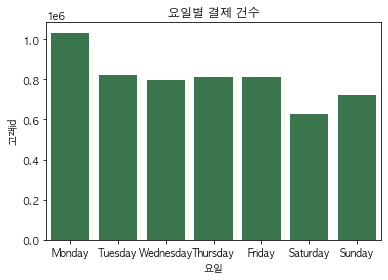

In [56]:
# 요일별 결제 건수 시각화
f, ax = plt.subplots(1, 1)
sns.barplot(x='요일', y='고객id', data=sum_of_purchase_by_week, color='#317F4B')
plt.title('요일별 결제 건수')
plt.show()

In [57]:
# 요일별 프로모션 금액 총합
sum_of_purchase_amount_by_week = chai_df.groupby(
    '요일')['할인금액'].sum()
sum_of_purchase_amount_by_week = sum_of_purchase_amount_by_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sum_of_purchase_amount_by_week = sum_of_purchase_amount_by_week.reset_index()
sum_of_purchase_amount_by_week

,요일,할인금액
0,Monday,1683207786
1,Tuesday,1136715388
2,Wednesday,1087627785
3,Thursday,1287375009
4,Friday,1038422327
5,Saturday,834805817
6,Sunday,925414732


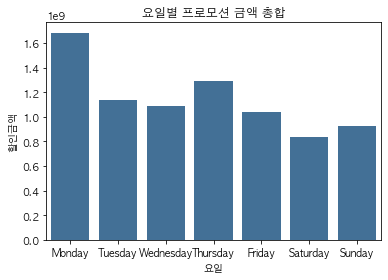

In [58]:
# 요일별 프로모션 금액 총합 시각화


f, ax = plt.subplots(1, 1)
sns.barplot(x='요일', y='할인금액',
            data=sum_of_purchase_amount_by_week, color='#3571A4')
plt.title('요일별 프로모션 금액 총합')
plt.show()

결론 :  
- 월요일에 결제 건수와 프로모션 금액이 가장 컸다. 
- 고객들은 월요일에 할인 쿠폰을 사용하여 결제를 가장 많이 했음을 알 수 있다.

**3-b. 시간대_출근 시간대/ 취침 전 이용율이 높을 것이다.**

In [59]:
# 시간대별 결제 건수
sum_of_purchase_by_hour = chai_df.groupby(
    '결제일_시각')['고객id'].count().sort_values(ascending=False).reset_index()
sum_of_purchase_by_hour

,결제일_시각,고객id
0,10,420120
1,0,339740
2,22,338095
3,11,329662
4,21,310909
5,9,301279
6,20,291452
7,1,275660
8,12,271406
9,13,264831


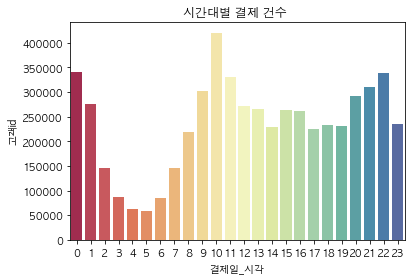

In [60]:
# 시간대별 결제 건수 시각화/
f, ax = plt.subplots(1, 1)
sns.barplot(x='결제일_시각', y='고객id',
            data=sum_of_purchase_by_hour, palette='Spectral')
plt.title('시간대별 결제 건수 ')
plt.show()

In [63]:
# 요일/시간대별 결제 건수
sum_of_purchase_by_wh = pd.pivot_table(
    data=chai_df, values='고객id', index='결제일_시각', columns='요일', aggfunc='count')
sum_of_purchase_by_wh = sum_of_purchase_by_wh.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sum_of_purchase_by_wh

요일,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
결제일_시각,,,,,,,
0,65391,52474,49431,50969,49993,37082,34400
1,51177,39091,37805,41577,41221,32490,32299
2,26495,20305,19995,21841,22608,16805,17554
3,15708,12481,11935,12984,14006,9020,10776
4,12294,8925,8496,9224,10261,5954,7000
5,10912,8747,8127,8787,9483,5492,5907
6,16254,13081,12432,13546,14304,8082,7734
7,27320,22559,21156,24070,23529,14769,12174
8,40152,32512,31126,33059,34771,24675,21881


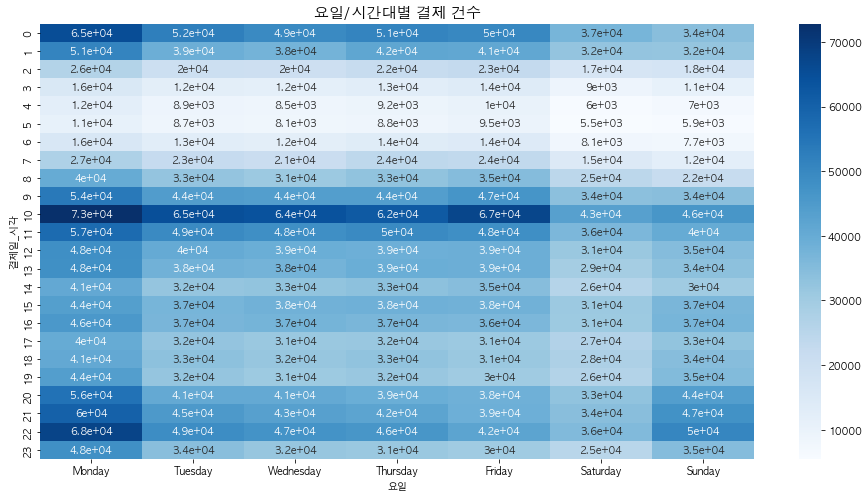

In [64]:
# 요일/시간대별 결제 건수 시각화
plt.figure(figsize=(16, 8))
ax = sns.heatmap(sum_of_purchase_by_wh, annot=True, cmap='Blues')
plt.title('요일/시간대별 결제 건수', fontsize=15)
plt.show()

결론 :  
- 월요일 오전 10시 주문 건수가 가장 많았다.
- 퇴근시간대(17-19시) 결제량은 예상보다 적은 편이었다.
- 출근시간대(7-9시) 결제량보다는 출근 직 후(9-10시) 결제량이 많았다.

**4-a. 푸시를 받는 사람의 이용율이 높을 것이다.**

In [65]:
chai_df_push = chai_df.groupby('푸시여부').agg(
    {'총혜택받은금액': ['sum', 'median', 'mean', 'min', 'max']})
chai_df_push = chai_df_push.reset_index()
chai_df_push

푸시여부     총혜택받은금액                        
                 sum median mean min     max
0  False  4442635360   1134 1635   0  319313
1   True  4240799555   1000 1459   0  500000

결론 :  
가설과는 다르게 푸시여부와 총혜택받은 금액 사이에 큰 관계가 없다.

**5-a. 생일인 달에 프로모션율이 높았을 것이다. (생일쿠폰 제공 예측)**

In [66]:
chai_df['생일_월'] = chai_df['생년월일'].dt.month

In [67]:
chai_not_birth = chai_df.loc[chai_df['생일_월'] != chai_df['결제일_월']]['프로모션율'].describe().reset_index()
chai_not_birth

,index,프로모션율
0,count,5133295
1,mean,11
2,std,11
3,min,0
4,25%,3
5,50%,10
6,75%,11
7,max,100


In [68]:
chai_birth = chai_df.loc[chai_df['생일_월'] == chai_df['결제일_월']]['프로모션율'].describe().reset_index()
chai_birth

,index,프로모션율
0,count,490515
1,mean,11
2,std,11
3,min,0
4,25%,3
5,50%,10
6,75%,11
7,max,100


결론 :  
- 결제월과 생일월이 같을 때의 프로모션율과 결제월과 생일월이 다를 때의 프로모션율에 차이가 없는 것으로 보아 생일쿠폰 미제공 예측


**5-b. 가입일자와 첫 구매 일자의 간격이 짧은 사람이 혜택 받은 총 금액이 클 것이다. (첫 구매 할인혜택 등을 이용하기 위해 가입했을 것이라고 유추 가능)**

In [69]:
chai_df.groupby('결제구간').mean()['프로모션율'].sort_values(ascending=False).reset_index()

,결제구간,프로모션율
0,0,21
1,-1,21
2,325,17
3,17,17
4,11,16
...,...,...
305,291,3
306,301,3
307,317,3
308,305,3


결론 :  
- 가입일과 결제일이 당일에 모두 이루어지거나, 선 결제 후 가입한 경우에 프로모션의 총합이 가장 크다. 
- 가입 후 첫 결제 쿠폰을 제공하는 마케팅이 이루어졌을 것이라고 예측 가능
- 해당 프로모션이 고객 유치에 긍정적 영향을 끼친다고 판단. 지속적으로 가입 후 첫 결제 할인 쿠폰 제공 제안

**5-c. RFM 분석을 통해 고객 등급을 나눠 차등 혜택을 제공할 수 있다.**
- RFM 분석법이란 CRM(Customer Relationship Management) 기법 중 하나.
- Recency(얼마나 최근에 구매했나?), Frequency(얼마나 자주 구매했나?), Monetary(얼마나 많은 금액을 사용했나?)를 통해 고객 집단을 나눠 그룹별 차등 혜택을 제공할 수 있다.

In [70]:
# 최근성(Recency)의 기준점을 찾기 위해 날짜를 오름차순 정렬

chai_df['결제일_뉴'].sort_values(ascending=False)

1445577   2020-03-31 23:59:14.018
1641305   2020-03-31 23:59:11.789
4258081   2020-03-31 23:59:04.295
4897499   2020-03-31 23:58:55.267
4874307   2020-03-31 23:58:51.744
                    ...          
684034    2019-08-01 00:32:57.712
54138     2019-08-01 00:32:57.680
826564    2019-08-01 00:32:57.160
2619610   2019-08-01 00:32:56.346
2639466   2019-08-01 00:32:56.331
Name: 결제일_뉴, Length: 5623810, dtype: datetime64[ns]

In [71]:
# 기준일 설정
import datetime
max_date = max(pd.to_datetime(
    chai_df['결제일_뉴'], errors='raise'))+datetime.timedelta(days=1)
max_date

Timestamp('2020-04-01 23:59:14.018000')

In [73]:
# RFM 테이블 만들기
rfm = chai_df.groupby(['고객id']).agg({'결제일_뉴': lambda x: (
    max_date-pd.to_datetime(x.max())).days,
    '고객id': 'count', '할인후(결제금액)': 'sum'})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm

,recency,frequency,monetary
고객id,,,
1,218,2,18960
2,169,2,19359
3,221,1,13440
4,91,8,216980
5,8,6,55170
...,...,...,...
544917,205,2,34740
544918,5,21,252665
544919,1,43,483123


In [74]:
rfm['recency'].describe()

count   544921
mean        76
std         71
min          1
25%         19
50%         54
75%        115
max        244
Name: recency, dtype: float64

<AxesSubplot:xlabel='recency', ylabel='Count'>

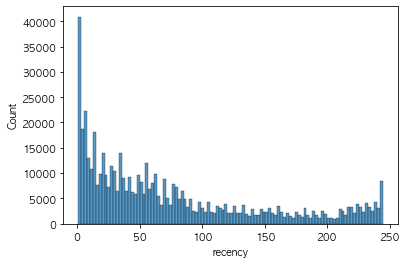

In [75]:
sns.histplot(rfm['recency']) 

결론 :  
- Recency의 통계량을 확인하면 마지막 날짜가 2020-04-01로부터 평균 76일 정도 지났다.  
- 최근 구매한 고객이 많다.

In [76]:
rfm['frequency'].describe()

count   544921
mean        10
std         21
min          1
25%          1
50%          3
75%         10
max       2705
Name: frequency, dtype: float64

In [77]:
rfm['monetary'].describe()

count      544921
mean       196438
std        527836
min             0
25%         20140
50%         60480
75%        191024
max     112273800
Name: monetary, dtype: float64

In [78]:
#최신성, 빈도 및 금전적 점수를 기준으로 고객 순위 지정
rfm['R_rank'] = rfm['recency'].rank(ascending=False)
rfm['F_rank'] = rfm['frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['monetary'].rank(ascending=True)


In [79]:
#여기서 순위를 분석하기 위해 고객의 순위를 정규화

rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100 # 순위 /전체인원 나누기 * 100 
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100


#rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm.head()


,recency,frequency,monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
고객id,,,,,,,,,
1,218,2,18960,41406,199796,129682,8,37,37
2,169,2,19359,80238,199796,131056,15,37,37
3,221,1,13440,37102,81614,88499,7,15,15
4,91,8,216980,168262,382273,421614,31,70,70
5,8,6,55170,466550,348870,260864,87,64,64


In [97]:
#RFM 점수 계산
#RFM 점수는 최신성, 빈도, 금전적 가치 정규화 순위를 기반으로 계산

#rfm 점수를 계산하는 데 사용되는 공식은 다음과 같음
#1)0.15*최신성 점수 + 0.28*빈도 점수 + 0.57 *금전적 점수 
#2)이 점수를 기준으로 고객을 나눕니다. 여기서는 5등급으로 평가

rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 *rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm= rfm.round(2)



#활용되는 데이터의 보유 기관 특수성을 고려하여 가중치를 각각 
#W1=0.15, W2=0.28, W3=0.57로 선택하여 RFM 모형을 완성
# https://bit.ly/3imQfOs (RFM 모형의가중치 선택에 관한 연구 참고)

3. RFM 모형의 가중치 선택에 관한 선행연구
1) 파레토 법칙에 의한 결정
2) 로지스틱 회귀분석에 의한 결정
3) 직관에 의한 결정
담당자의 직관으로 RFM 모형의 가중치를 결정하는 것은 복잡한 통계 기법이
들어가지 않아도 간편하게 적용할 수 있는 장점


고객들을 5개 또는 10개
의 등급으로 구분하더라도 이는 R, F, M 각 요소의 중요도를 판별할 수 있는 근
거가 부족하였으며 이를 보완하고자 가중치 부여에 대한 연구들이 끊임없이 진
행되어 왔다 :직관에 의한 결정

In [98]:
# RFM 점수를 기반으로 고객 평가
# rfm 점수 >4.5: 'Diamond'
# 4.5 > rfm 점수 > 4 : 'Platinum'
# 4>rfm 점수 >3 : 'Gold'
# 3>rfm 점수>1.6 : 'Silver'
# rfm 점수<1.6 : 'Bronze'

rfm['Customer_segment'] = np.where(rfm['RFM_Score']>
                                   4.5,'Diamond',
                                   (np.where(
                                       rfm['RFM_Score'] > 4,
                                       'Platinum',
                                       (np.where(
                            rfm['RFM_Score'] > 3,
                                           'Gold',
                        np.where(rfm['RFM_Score'] > 1.6,'Silver', 
                                                            'Bronze'))))))


In [99]:
rfm['Customer_segment'].value_counts()

Bronze      167420
Silver      165134
Gold        113909
Platinum     54754
Diamond      43704
Name: Customer_segment, dtype: int64

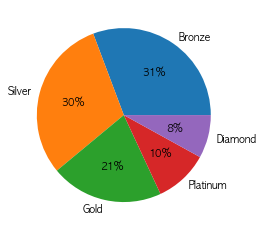

In [100]:
plt.pie(rfm.Customer_segment.value_counts(),
labels=rfm.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()

In [101]:
# rfm 테이블 저장
rfm.to_csv('/Users/soon/Desktop/final_project/rfm(고객의 순위를 정규화1).csv')


결론 :  
1. RFM 고객 분석을 통해 5등급의 고객등급을 확인하였다.

- Diamond ,  8%(43703)
- Platinum , 10%(54763)
- Gold    , 21%(113901)
- Silver  , 30%(165134)
- Bronze  , 31%(167420)


- 고객등급에 따라 쿠폰발행(생일, 푸쉬알림)등 효과적인 마케팅 활용방안제시를 할 예정


**5-d. 코호트 분석을 통해 고객 등급을 나눠 차등 혜택을 제공할 수 있다.**  
- 특정 기간 동안 일정한 기준으로 동일하게 묶을 수 있는 사용자들의 집단을 분석  
- 고객 이탈률과 재구매율 파악하기 위한 목적으로 이용  
 1) 월별 소비자 집단 중 이탈이 가장 많은 집단을 파악  
 2) 수익성 기반 Retention을 재고해야 할 집단을 선정

In [102]:
chai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 34 columns):
 #   Column      Dtype         
---  ------      -----         
 0   고객id        int64         
 1   결제일         object        
 2   할인전         int64         
 3   할인후(결제금액)   int64         
 4   적립금액        int64         
 5   할인금액        int64         
 6   총혜택받은금액     int64         
 7   푸시여부        bool          
 8   성별          object        
 9   외국인여부       bool          
 10  생년월일        datetime64[ns]
 11  가입일         object        
 12  판매자식별번호     int64         
 13  결제일_뉴       datetime64[ns]
 14  결제일_연       int64         
 15  결제일_월       int64         
 16  결제일_일       int64         
 17  결제일_시각      int64         
 18  가입일_뉴       datetime64[ns]
 19  가입일_연       int64         
 20  가입일_월       int64         
 21  가입일_일       int64         
 22  가입일_시각      int64         
 23  프로모션율       float64       
 24  올해          datetime64[ns]
 25  나이          int64 

In [103]:
# 고객별 첫 구매일 추출
first_order = chai_df.groupby('고객id')['결제일_연월'].min()
first_order.sample(5)

고객id
399195    2019-08
203542    2019-12
168284    2019-08
44333     2019-08
79515     2019-09
Name: 결제일_연월, dtype: object

In [107]:
# 고객의 첫 구매 데이터를 DataFrame에 붙이기
chai_df = chai_df.set_index('고객id')

In [108]:
# 데이터 First 데이터는 Series + DF는 pandas이기에 Index 기준 자동 병합가능
chai_df['FirstOrder'] = first_order

In [109]:
## Index의 정상화
chai_df.reset_index(inplace=True)

In [110]:
chai_df['OrderCycle']=chai_df['결제일_연월']
chai_df.sample(2)

,고객id,결제일,할인전,할인후(결제금액),적립금액,할인금액,총혜택받은금액,푸시여부,성별,외국인여부,...,올해,나이,나이대,결제구간,요일,결제일_연월,혜택여부,생일_월,FirstOrder,OrderCycle
3190002,174169,2019-10-20 19:07:39.354,12510,11120,0,1390,1390,True,female,False,...,2022-11-28,56,50,86,Sunday,2019-10,True,5,2019-08,2019-10
2298730,541708,2020-03-13 14:31:49.432,12500,12500,375,0,375,False,male,False,...,2022-11-28,37,30,202,Friday,2020-03,True,12,2019-08,2020-03


In [111]:
# 주기별 구매 User수 계산
co1 = chai_df.groupby(['FirstOrder', 'OrderCycle'])['고객id'].nunique()
co1 = co1.reset_index()
co1.rename({'고객id': 'TotalUsers'}, axis = 1, inplace = True)

In [112]:
## 주기별 구매 금액 계산
co2 = chai_df.groupby(['FirstOrder', 'OrderCycle'])['할인후(결제금액)'].sum()
co2 = co2.reset_index()
co2.rename({'할인후(결제금액)': 'PurchaseAmnt'}, axis = 1, inplace = True)

In [113]:
## 데이터 병합
co = co1.merge(co2, on = ['FirstOrder', 'OrderCycle'])
co.head()

,FirstOrder,OrderCycle,TotalUsers,PurchaseAmnt
0,2019-08,2019-08,196064,10140004315
1,2019-08,2019-09,101998,8110686238
2,2019-08,2019-10,97411,10046073918
3,2019-08,2019-11,95789,7878611609
4,2019-08,2019-12,85824,7565158258


In [114]:
# 코호트 기준 기간 계산
# 모든 Row에서 월의 차이를 구하는 코드를 for문을 통해 계산
!pip install ipypb
from ipypb import ipb
temp = []
 
for i in ipb(range(co.shape[0])):
    f_first_order = pd.to_datetime(co.FirstOrder[i]).to_period('M')
    f_order_cycle = pd.to_datetime(co.OrderCycle[i]).to_period('M')
    
    month_diff = (f_order_cycle - f_first_order).n
    
    temp.append(month_diff)
co['CohortPeriod'] = temp

 [████████████████████████████████████████████████████████████] 36/36 [00:00<00:00, 0.00s/it]

In [115]:
# 첫 번째. 재방문율 계산을 위한 Pandas Unstack 활용
co_retention = co.set_index(['FirstOrder', 'CohortPeriod'])
co_retention = co_retention.TotalUsers.unstack(1)
retention = co_retention.div(co_retention[0],axis = 0)
 
# 두 번째. 구매 규모 형태 치환을 위한 Pandas Unstack 활용
co_purchase = co.set_index(['FirstOrder', 'CohortPeriod'])
co_purchase = co_purchase.PurchaseAmnt.unstack(1)

<AxesSubplot:xlabel='CohortPeriod', ylabel='FirstOrder'>

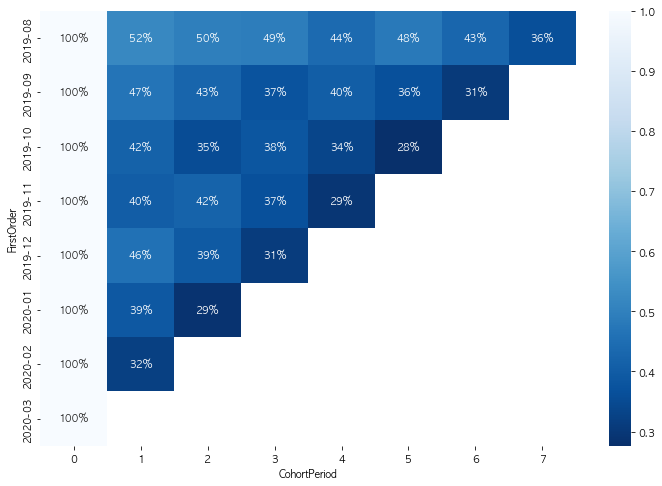

In [116]:
# 재방문율 시각화 진행
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(retention, annot = True, fmt = '.0%', cmap= 'Blues_r')

결론 :  
1. 월별 소비자 집단 중 이탈이 가장 많은 집단 파악  
- 코호트 기간을 1로 고정하고 봤을 때, 가장 이탈률 높은 집단 Top3  
1) 2020년 2월 - 재구매율 32%   
2) 2020년 1월 - 재구매율 39%  
3) 2019년 11월 - 재구매율 40%      


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, '2019-08'),
  Text(0, 1.5, '2019-09'),
  Text(0, 2.5, '2019-10'),
  Text(0, 3.5, '2019-11'),
  Text(0, 4.5, '2019-12'),
  Text(0, 5.5, '2020-01'),
  Text(0, 6.5, '2020-02'),
  Text(0, 7.5, '2020-03')])

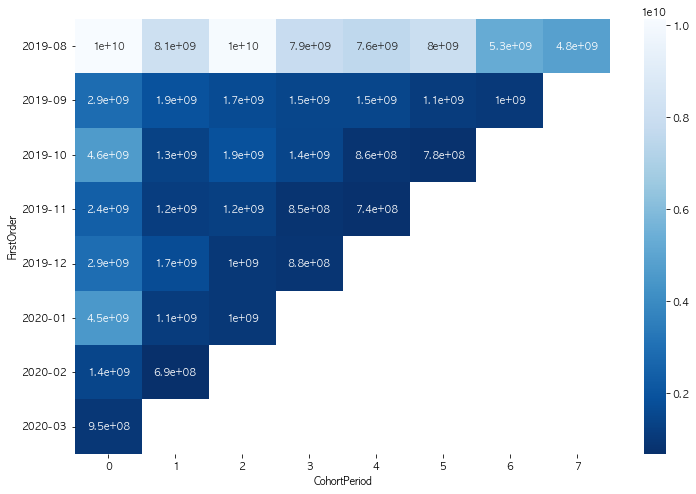

In [117]:
# 구매 규모 시각화
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(co_purchase, annot=True
            # , fmt = '.0%'
            ,cmap= 'Blues_r')
plt.yticks(rotation=360)

결론 :  
2. 수익성 기반 Retention을 재고해야 할 집단 선정 
- 코호트 기간을 0으로 고정하고 봤을 때, 구매 규모가 가장 큰 집단 Top3  
1) 2019년 8월  
2) 2019년 11월  
3) 2019년 9월&2019년 12월  
> 2019년 11월에 구매한 고객들은 이탈률이 Top3에서 3위일만큼 높았고, 구매 규모가 큰 집단 Top3에서 2위일만큼 크므로 2019년 11월 구매 고객을 대상으로 추가 할인 쿠폰을 제공하는 방향 제시